Post-lecture activity 3: Canny Edge Detection

BY: BRAYAN DURAN TOCONAS

Presented in class +2 pts

/home/hackbrian/anaconda3/envs/vision/lib/python3.10/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


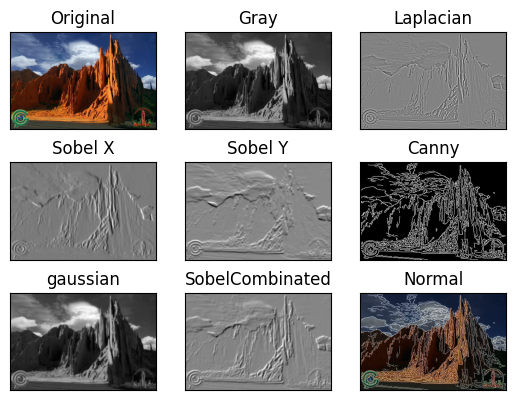

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, requests

# Download an image
img0 = requests.get("https://i.pinimg.com/originals/08/c1/d3/08c1d3e9aea83550fa08ede14c9e0997.jpg" , verify=False).content
with open('image.jpg', 'wb') as file:
    file.write(img0)

img0 = cv2.imread('image.jpg')
imgFullColor = cv2.imread('image.jpg')
imgFullColor = cv2.cvtColor(imgFullColor, cv2.COLOR_BGR2RGB)


scale_percent = 30 # percent of original size
width = int(img0.shape[1] * scale_percent / 100)
height = int(img0.shape[0] * scale_percent / 100)
dim = (width, height)

img0 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
img0_color = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img0_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(img0_gray,(3,3),0)
gausian=img

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F, 1, 0,ksize=5)  # derivative x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # derivative y

Canny = cv2.Canny(img0_gray, 30, 100)
combined=sobelx+sobely
image1=imgFullColor
image2=Canny
width = min(image1.shape[1], image2.shape[1])
height = min(image1.shape[0], image2.shape[0])

image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))
image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)


alpha = 0.5  # Controla la transparencia de la superposición
NormalAdd = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)

images = [imgFullColor,img0_gray, laplacian, sobelx, sobely,Canny,gausian,combined,NormalAdd]
titles = ['Original','Gray', 'Laplacian', 'Sobel X', 'Sobel Y','Canny','gaussian','SobelCombinated','Normal']

for num, (image, title) in enumerate(zip(images, titles)):
  plt.subplot(3,3,num+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])

Direccion [[         nan   0.           0.         ...  -0.          -0.
           nan]
 [ 90.          76.39945748  62.31893843 ...  -7.3343788  -23.68208772
   90.        ]
 [ 90.          81.33939633  67.09423034 ...  -6.34019175 -37.30394828
   90.        ]
 ...
 [-90.         -89.47436539 -89.23097532 ...  84.14398641  86.3444047
  -90.        ]
 [-90.         -85.07289005 -84.70991879 ...  89.51853419 -87.84703721
  -90.        ]
 [         nan   0.           0.         ...   0.           0.
           nan]]


/tmp/ipykernel_5726/4216059731.py:2: RuntimeWarning: divide by zero encountered in divide
  Pdirection=np.arctan((sobely/sobelx))
/tmp/ipykernel_5726/4216059731.py:2: RuntimeWarning: invalid value encountered in divide
  Pdirection=np.arctan((sobely/sobelx))


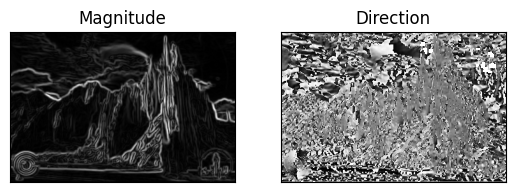

In [25]:
Pmagnitude=np.sqrt(np.square(sobelx)+np.square(sobely))
Pdirection=np.arctan((sobely/sobelx))

##print(Pmagnitude)
print("Direccion",np.rad2deg(Pdirection))
##print("Rango matrix:2",np.matrix_rank (Pdirection))
images = [Pmagnitude,Pdirection]
titles = ['Magnitude','Direction']

for num, (image, title) in enumerate(zip(images, titles)):
  plt.subplot(1,2,num+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])